<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Copy_of_Magnetno_polje_v_osi_tuljave_induktivnost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Izračun polja v osi tuljave

R je polmer tuljave
NI je N*I
l je dolžina tuljave (z2-z1)

Formula za izračun polja v osi tuljave je:

$$ {B_z} =\frac{{{\mu _0}NI}}{{2l}}\left( {\frac{{{z_2} - z}}{{\sqrt {{{\left( {z - {z_2}} \right)}^2} + {R^2}} }} - \frac{{({z_1} - z)}}{{\sqrt {{{\left( {z - {z_1}} \right)}^2} + {R^2}} }}} \right)$$


In [0]:
from IPython.display import Image
from IPython.core.display import HTML 

In [0]:
Image(url= "https://raw.githubusercontent.com/osnove/Slike/master/oe2_solenoid.png")

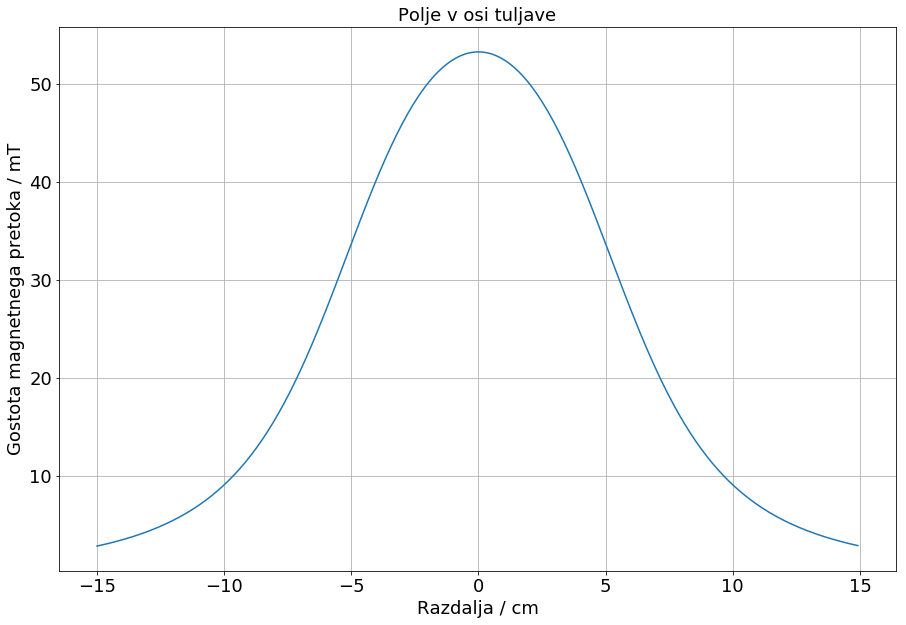

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

NI=6000   # tok
R=5e-2     # polmer
mi0=4*np.pi*1e-7  # permeabilnost
z1=-5e-2
z2=5e-2
l=z2-z1    # dolžina

z=np.arange(-15,15,0.11)*1e-2

B=mi0*NI/(2*l)*((z2-z)/np.sqrt((z-z2)**2+R**2)-(z1-z)/np.sqrt((z-z1)**2+R**2))
plt.figure(figsize=(15,10))
plt.title('Polje v osi tuljave',fontsize=18)
plt.xlabel('Razdalja / cm',fontsize=18)
plt.ylabel('Gostota magnetnega pretoka / mT',fontsize=18)
plt.tick_params(labelsize=18)

plt.plot(z*1e2,B*1e3)
plt.grid()
plt.show()


## Izračun induktivnosti 
po http://info.ee.surrey.ac.uk/Workshop/advice/coils/air_coils.html


In [0]:
Image(url= "https://raw.githubusercontent.com/osnove/Slike/master/mult_layer_air_coil.png")


In [0]:
Image(url= "https://raw.githubusercontent.com/osnove/Slike/master/Brooks_ratio.png")

In [0]:
d= 0.05  # premer tuljave
c=0.03  # debelina (višina) ovojev
b=0.10   # dolžina tuljave
N=1000    # število ovojev


a=(d+c)/2 # srednji polmer v m

S1 = (c/(2*a))**2 


L = 4E-7*np.pi*a*N**2*((0.5+S1/12)*np.log(8/S1) - 0.84834+0.2041*S1)
L   # v Henryjih



0.06274480469336968

## Izračun polja s sumacijo po višini

In [0]:
I=6 # Tok v žici
NI=N*I # A-ovoji
nl=15 # Number of layers (debelina žice * nl = c)
Il=NI/nl  # tok v enem layerju
Ball=0

def B2(r,z):
	# This function returns B for specific radius and position z 
  B2=mi0*Il/(2*l)*((z2-z)/np.sqrt((z-z2)**2+r**2)-(z1-z)/np.sqrt((z-z1)**2+r**2))
  return B2
 
for i in range(1,nl):
  r=(d/2)+i/nl*c
  Bl=B2(r,0)
  Ball=Ball+Bl 
  print(Bl)

print("Polje v sredini je ",Ball*1e3, "mT")

0.004422886933014146
0.004348121006897477
0.004272076884079683
0.0041952044484340045
0.0041179087729422
0.0040405500882946055
0.003963444883078566
0.0038868678558097542
0.0038110544684693097
0.003736203886890232
0.003662482130919684
0.0035900252936793744
0.003518942722485669
0.0034493200830061493
Polje v sredini je  55.015089458000865 mT
